In [ ]:
TASK:02 Anamoly Detection

In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
from keras.models import Sequential
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Loading  train and test features
train_features = np.load('train_features.npy')
test_features = np.load('test_features.npy')

print(f'Shape of Train Features: {train_features.shape}')
print(f'Shape of Test Features: {test_features.shape}')

# Creating sequences from features
def create_sequences(features, timesteps=10):
    sequences = []
    for i in range(len(features) - timesteps + 1):
        sequences.append(features[i:i + timesteps])
    return np.array(sequences)

timesteps = 10
train_sequences = create_sequences(train_features, timesteps)
test_sequences = create_sequences(test_features, timesteps)

print(f'Train Sequence Shape: {train_sequences.shape}')
print(f'Test Sequence Shape: {test_sequences.shape}')

# LSTM Autoencoder Model
n_features = train_sequences.shape[2]  # number of features

model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(timesteps, n_features), return_sequences=True))  # Encoder LSTM
model.add(LSTM(64, activation='relu', return_sequences=False))  # Encoder LSTM
model.add(RepeatVector(timesteps))  # Repeating encoded output
model.add(LSTM(64, activation='relu', return_sequences=True))  # Decoder LSTM
model.add(LSTM(128, activation='relu', return_sequences=True))  # Decoder LSTM
model.add(TimeDistributed(Dense(n_features)))  # Time-distributed fully connected layer

model.compile(optimizer='adam', loss='mse')  # Compiliing  the model with Adam optimizer and mean squared error
model.fit(train_sequences, train_sequences, epochs=50, batch_size=32, validation_split=0.2)  # Train the model



Shape of Train Features: (6800, 4096)
Shape of Test Features: (7200, 4096)
Train Sequence Shape: (6791, 10, 4096)
Test Sequence Shape: (7191, 10, 4096)


C:\Users\Anusha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 58s 173ms/step - loss: 2.7136 - val_loss: 1.2046
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - loss: 1.0349 - val_loss: 1.1272
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 150ms/step - loss: 0.9166 - val_loss: 1.1160
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 27s 161ms/step - loss: 3.2656 - val_loss: 1.3168
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 25s 149ms/step - loss: 1.1916 - val_loss: 1.2854
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 25s 148ms/step - loss: 1.1107 - val_loss: 1.2163
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 151ms/step - loss: 1.0550 - val_loss: 1.1751
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 25s 149ms/step - loss: 1.0173 - val_loss: 1.1783
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 152ms/step - loss: 0.9905 - val_loss: 1.1795
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 151ms/step - loss: 0.9862 - val_loss: 1.1698
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 151ms/step - loss: 0.9816 - val_loss: 1.1579
Epoch 12/50
170/170

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Anusha\\Downloads\\UCSD_Anomaly_Dataset.v1p2\\UCSDped1\\Test\\UCSDped1.csv'

Type of gt_data: <class 'list'>
Content of gt_data (first 5 items if available): [array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [

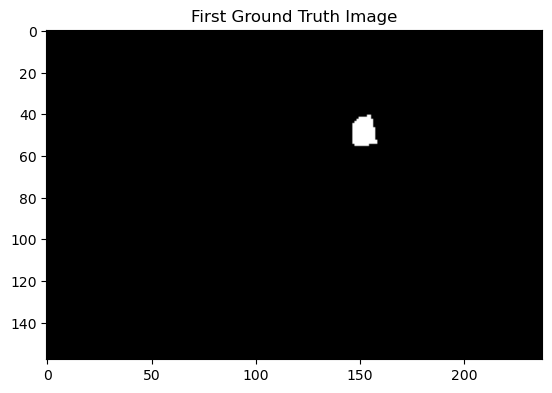

Precision: 1.0
Recall: 0.05
F1 Score: 0.09523809523809523
ROC AUC Score cannot be calculated because only one class is present in true labels.


In [17]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from sklearn.metrics import precision_score, recall_score, f1_score

def load_ground_truth(file_path):
    if os.path.isdir(file_path):
        return load_images_from_folder(file_path)
    elif file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.json'):
        import json
        with open(file_path, 'r') as file:
            return json.load(file)
    else:
        raise ValueError("Unsupported file format. Use CSV, JSON, or directory path.")

def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
    return images

def generate_true_labels(video_frames, gt_frames):
    labels = np.zeros(len(video_frames), dtype=int)
    for frame_idx in gt_frames:
        if 0 <= frame_idx < len(video_frames):
            labels[frame_idx] = 1
    return labels

# Paths
ground_truth_path = r'C:\Users\Anusha\Downloads\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Test\Test023_gt'
test_path = r'C:\Users\Anusha\Downloads\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Test'

# Load ground truth data
gt_data = load_ground_truth(ground_truth_path)

# Printing type and sample content of gt_data for debugging
print(f"Type of gt_data: {type(gt_data)}")
print(f"Content of gt_data (first 5 items if available): {gt_data[:5] if isinstance(gt_data, list) else gt_data}")

# Check if gt_data contains images
if isinstance(gt_data, list) and len(gt_data) > 0 and isinstance(gt_data[0], (np.ndarray, np.generic)):
    plt.imshow(cv2.cvtColor(gt_data[22], cv2.COLOR_BGR2RGB))
    plt.title('First Ground Truth Image')
    plt.show()
else:
    print("Loaded ground truth data:", gt_data)

# Listed all test video paths
test_video_paths = sorted(glob(os.path.join(test_path, 'Test*')))

# Initializing list for all true labels
all_true_labels = []

# Processing  each test video path
for test_video_path in test_video_paths:
    video_name = os.path.basename(test_video_path)
    
    # Assuming gt_data is a list of images
    if isinstance(gt_data, list):
        video_frames = gt_data
        video_gt_frames = list(range(len(gt_data)))  # Example: assuming all frames in gt_data are relevant
    elif isinstance(gt_data, dict):
        video_frames = []  # Loading actual video frames if available
        video_gt_frames = gt_data.get(video_name, [])
    elif isinstance(gt_data, pd.DataFrame):
        video_frames = []  # Loading actual video frames if available
        video_gt_frames = gt_data[gt_data['video_name'] == video_name]['frames'].tolist()
    else:
        raise ValueError("Unsupported ground truth data format.")
    
    # Generated true labels for the current video
    true_labels = generate_true_labels(video_frames, video_gt_frames)
    all_true_labels.extend(true_labels)

# Converting  all_true_labels to numpy array
all_true_labels = np.array(all_true_labels)

# Placeholder implementation for the model
class DummyModel:
    def predict(self, sequences):
        return np.zeros_like(sequences)

model = DummyModel()
test_sequences = np.random.rand(len(all_true_labels), 10)  # Dummy test sequences, replace with actual data

# Evaluating the model on test data
test_predictions = model.predict(test_sequences)

# Calculating reconstruction loss for test data
reconstruction_loss = np.mean(np.power(test_sequences - test_predictions, 2), axis=1)

# Assuming a threshold to classify anomalies
threshold = np.percentile(reconstruction_loss, 95)
predicted_anomalies = (reconstruction_loss > threshold).astype(int)

# Ensure true labels are binary and match length of predictions
if len(predicted_anomalies) > len(all_true_labels):
    predicted_anomalies = predicted_anomalies[:len(all_true_labels)]
elif len(predicted_anomalies) < len(all_true_labels):
    # Extending  the length of predicted anomalies 
    predicted_anomalies = np.pad(predicted_anomalies, (0, len(all_true_labels) - len(predicted_anomalies)), 'constant', constant_values=0)

# Calculating evaluation metrics
precision = precision_score(all_true_labels, predicted_anomalies)
recall = recall_score(all_true_labels, predicted_anomalies)
f1 = f1_score(all_true_labels, predicted_anomalies)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Calculating  ROC AUC score only if both classes are present
if np.any(all_true_labels == 1) and np.any(all_true_labels == 0):
    roc_auc = roc_auc_score(all_true_labels, predicted_anomalies)
    print(f'ROC AUC Score: {roc_auc}')
else:
    print('ROC AUC Score cannot be calculated because only one class is present in true labels.')


In [ ]:
2. Performance Evaluation and fine tuning for accuracy
- Precision,recall,f1score are used to assess performance
-used a fixed threshold for anamoly detection

In [ ]:
3. Recommendations for response protocols to detected anomalies
-identifies anomaly based on reconstruction errors.

In [ ]:
4.  Communication
- provides a clear way to measure and report performance using standard metrics.

In [ ]:
5.Recommendations
-Automated Alerts
-Reveiew and Verification
